<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Missing_eGFR%26slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [3]:
df.head()

Unnamed: 0  PatientUID  Recent_Creatinine  Recent_eGFR  \
0           0      924852               2.63         15.8   
1           1      989278               2.03         32.3   
2           2     2103792               1.05         55.9   
3           3      953611               1.03         51.1   
4           4      488150               1.94         32.6   

               Recent_Date  PatientVisitUID     Slopes  G1M2:ARB  G3M1:Statin  \
0  2560-08-07 12:32:50.527          3349148   2.754717         0           30   
1  2560-08-11 08:22:48.737          3348711 -46.720000         0            0   
2  2560-08-14 14:38:44.150          3369057  11.018868         0            0   
3  2560-08-15 02:05:01.323          3366405  17.222520         0            0   
4  2560-08-15 09:18:43.240          3356167 -79.002653         0            0   

   G5M2:NSAIDs  ...  L25:Parathyroid hormone  L26:Vitamin D  \
0            0  ...                      NaN            NaN   
1            0  ...                      NaN            NaN   
2            0  ...                      NaN            NaN   
3            0  ...                      NaN            NaN   
4            0  ...                      NaN            NaN   

   L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                       17.0   

   L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                      NaN                    NaN                      NaN   
1                      NaN                    NaN                      NaN   
2                      NaN                    NaN                      NaN   
3                      NaN                    NaN                      NaN   
4                      NaN                    NaN                      NaN   

   L32:UrineProtein (24hrs)                                LabLocation  \
0                       NaN  ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร   
1                       NaN            ห้องปฏิบัติการจุลทรรศน์วินิจฉัย   
2                       NaN  ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร   
3                       NaN            ห้องปฏิบัติการจุลทรรศน์วินิจฉัย   
4                       NaN  ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร   

                  LabCwhen  
0  2559-08-01 08:15:57.943  
1  2559-08-01 09:14:12.527  
2  2559-08-08 09:42:53.923  
3  2559-08-06 10:35:19.840  
4  2559-08-03 08:44:33.377  

[5 rows x 94 columns]

In [4]:
df.shape #ข้อมูลทั้งหมดมี 94 columns , 52620 rows

(52620, 94)

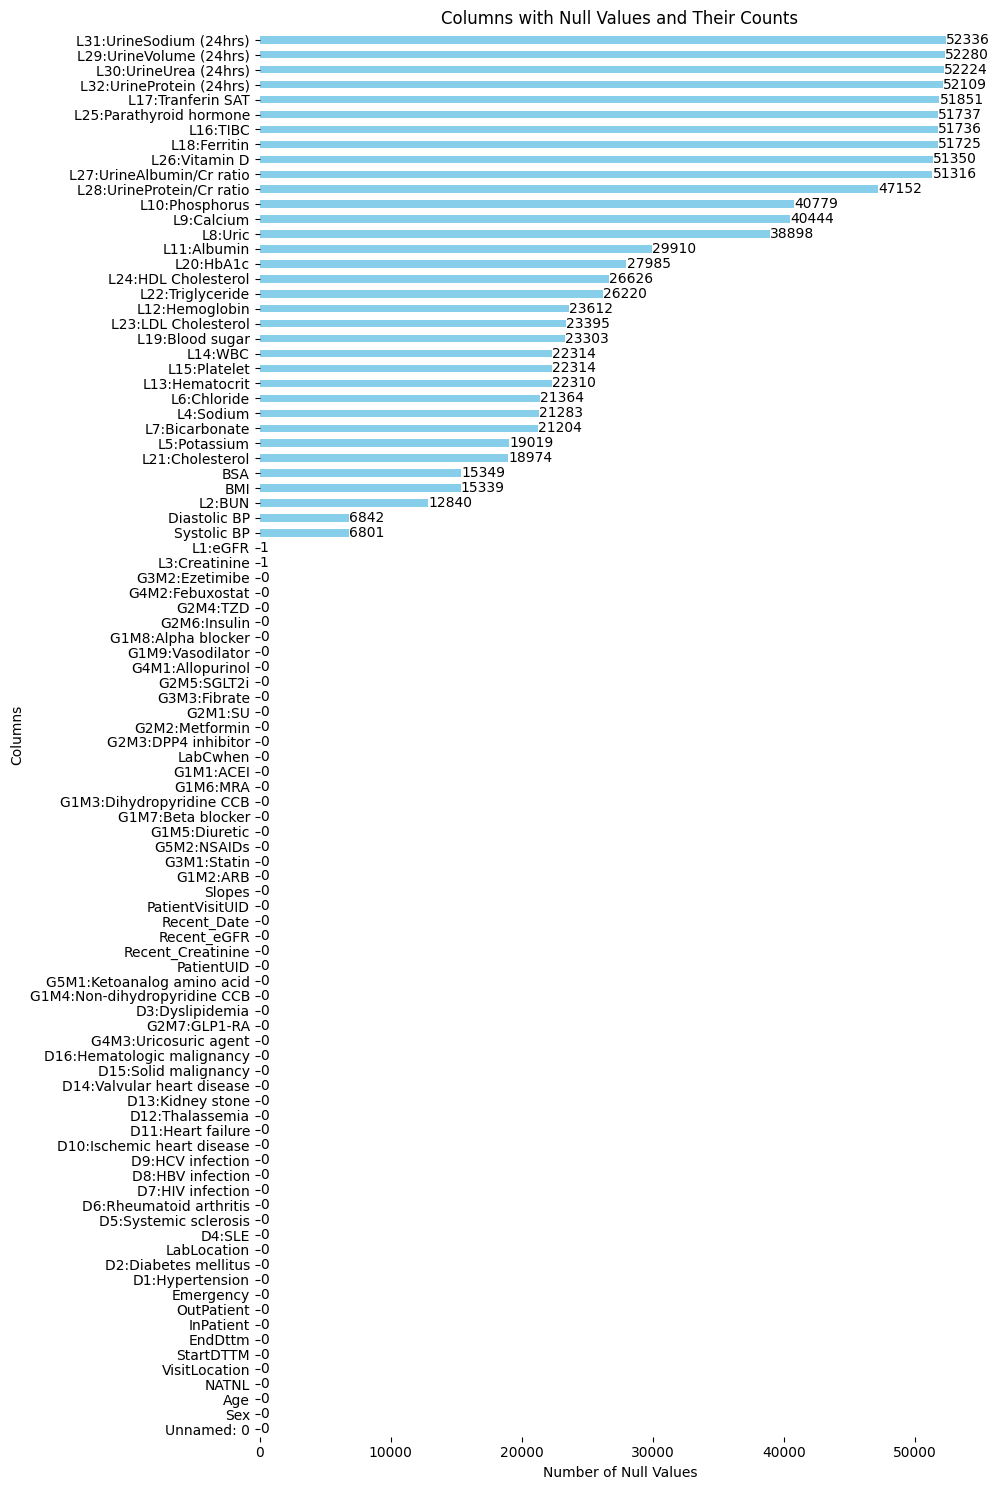

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [6]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR" เป็นคอลัมน์ที่ไม่มี Missing
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
stage = df[missing_columns]
stage.head() #36 คอลัมน์ที่มีค่าว่าง

PatientUID  Recent_eGFR     Slopes    BMI   BSA  Diastolic BP  Systolic BP  \
0      924852         15.8   2.754717    NaN   NaN          53.0        131.0   
1      989278         32.3 -46.720000  18.71  1.70          71.0        121.0   
2     2103792         55.9  11.018868  23.56  1.47          93.0        143.0   
3      953611         51.1  17.222520  27.50  1.41          60.0        120.0   
4      488150         32.6 -79.002653    NaN   NaN           NaN          NaN   

   L1:eGFR  L2:BUN  L3:Creatinine  ...  L23:LDL Cholesterol  \
0     13.0     NaN            3.1  ...                  NaN   
1     80.3     5.2            1.0  ...                  NaN   
2     44.7    22.6            1.3  ...                  NaN   
3     33.5    28.9            1.5  ...                147.0   
4    114.2     NaN            0.7  ...                  NaN   

   L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                  NaN                      NaN            NaN   
1                  NaN                      NaN            NaN   
2                  NaN                      NaN            NaN   
3                 30.0                      NaN            NaN   
4                  NaN                      NaN            NaN   

   L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                       17.0   

   L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                      NaN                    NaN                      NaN   
1                      NaN                    NaN                      NaN   
2                      NaN                    NaN                      NaN   
3                      NaN                    NaN                      NaN   
4                      NaN                    NaN                      NaN   

   L32:UrineProtein (24hrs)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 39 columns]

##แบ่งระยะ eGFR

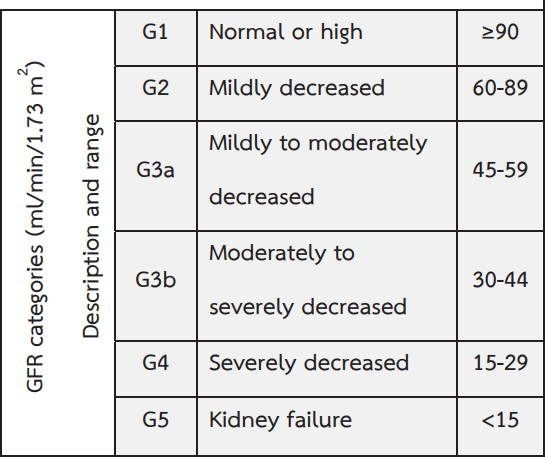

In [7]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'stage 4'
    else:
        return 'stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)
stage.head()

<ipython-input-7-3d93892ed459>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)


PatientUID  Recent_eGFR     Slopes    BMI   BSA  Diastolic BP  Systolic BP  \
0      924852         15.8   2.754717    NaN   NaN          53.0        131.0   
1      989278         32.3 -46.720000  18.71  1.70          71.0        121.0   
2     2103792         55.9  11.018868  23.56  1.47          93.0        143.0   
3      953611         51.1  17.222520  27.50  1.41          60.0        120.0   
4      488150         32.6 -79.002653    NaN   NaN           NaN          NaN   

   L1:eGFR  L2:BUN  L3:Creatinine  ...  L24:HDL Cholesterol  \
0     13.0     NaN            3.1  ...                  NaN   
1     80.3     5.2            1.0  ...                  NaN   
2     44.7    22.6            1.3  ...                  NaN   
3     33.5    28.9            1.5  ...                 30.0   
4    114.2     NaN            0.7  ...                  NaN   

   L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
0                      NaN            NaN                        NaN   
1                      NaN            NaN                        NaN   
2                      NaN            NaN                        NaN   
3                      NaN            NaN                        NaN   
4                      NaN            NaN                        NaN   

   L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
0                        NaN                      NaN                    NaN   
1                        NaN                      NaN                    NaN   
2                        NaN                      NaN                    NaN   
3                        NaN                      NaN                    NaN   
4                       17.0                      NaN                    NaN   

   L31:UrineSodium (24hrs)  L32:UrineProtein (24hrs)  eGFR_Category  
0                      NaN                       NaN        stage 4  
1                      NaN                       NaN       stage 3b  
2                      NaN                       NaN       stage 3a  
3                      NaN                       NaN       stage 3a  
4                      NaN                       NaN       stage 3b  

[5 rows x 40 columns]

In [8]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'Recent_eGFR','eGFR_Category'] + [col for col in stage.columns if col not in ['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category']]
stage = stage[column_order]
stage.head()

PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI   BSA  \
0      924852   2.754717         15.8       stage 4    NaN   NaN   
1      989278 -46.720000         32.3      stage 3b  18.71  1.70   
2     2103792  11.018868         55.9      stage 3a  23.56  1.47   
3      953611  17.222520         51.1      stage 3a  27.50  1.41   
4      488150 -79.002653         32.6      stage 3b    NaN   NaN   

   Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L23:LDL Cholesterol  \
0          53.0        131.0     13.0     NaN  ...                  NaN   
1          71.0        121.0     80.3     5.2  ...                  NaN   
2          93.0        143.0     44.7    22.6  ...                  NaN   
3          60.0        120.0     33.5    28.9  ...                147.0   
4           NaN          NaN    114.2     NaN  ...                  NaN   

   L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                  NaN                      NaN            NaN   
1                  NaN                      NaN            NaN   
2                  NaN                      NaN            NaN   
3                 30.0                      NaN            NaN   
4                  NaN                      NaN            NaN   

   L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                       17.0   

   L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                      NaN                    NaN                      NaN   
1                      NaN                    NaN                      NaN   
2                      NaN                    NaN                      NaN   
3                      NaN                    NaN                      NaN   
4                      NaN                    NaN                      NaN   

   L32:UrineProtein (24hrs)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 40 columns]

In [9]:
#จากมากไปน้อย
stage_sort = stage.sort_values(by='Recent_eGFR', ascending=False)
stage_sort.head()

PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI   BSA  \
51783      553538   0.058871       140.75       stage 1  18.88  1.20   
51784      553538 -51.636256       140.75       stage 1    NaN   NaN   
5319      2384626   0.795640       125.93       stage 1    NaN   NaN   
5318      2384626   7.984375       125.93       stage 1  23.31  1.54   
5317      2384626  79.441176       125.93       stage 1    NaN   NaN   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L23:LDL Cholesterol  \
51783          68.0        108.0   142.68     5.8  ...                  NaN   
51784          67.0        103.0   142.74     NaN  ...                  NaN   
5319           99.0        144.0   108.50    11.9  ...                  NaN   
5318           93.0        132.0   100.10     9.9  ...                  NaN   
5317           86.0        152.0    42.50    42.7  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
51783                  NaN                      NaN            NaN   
51784                  NaN                      NaN            NaN   
5319                   NaN                      NaN            NaN   
5318                   NaN                      NaN            NaN   
5317                   NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
51783                        NaN                        NaN   
51784                        NaN                        NaN   
5319                         NaN                        NaN   
5318                         NaN                        NaN   
5317                         NaN                       87.0   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
51783                      NaN                    NaN   
51784                      NaN                    NaN   
5319                       NaN                    NaN   
5318                       NaN                    NaN   
5317                       NaN                    NaN   

       L31:UrineSodium (24hrs)  L32:UrineProtein (24hrs)  
51783                      NaN                       NaN  
51784                      NaN                       NaN  
5319                       NaN                       NaN  
5318                       NaN                       NaN  
5317                       NaN                       NaN  

[5 rows x 40 columns]

<Axes: >

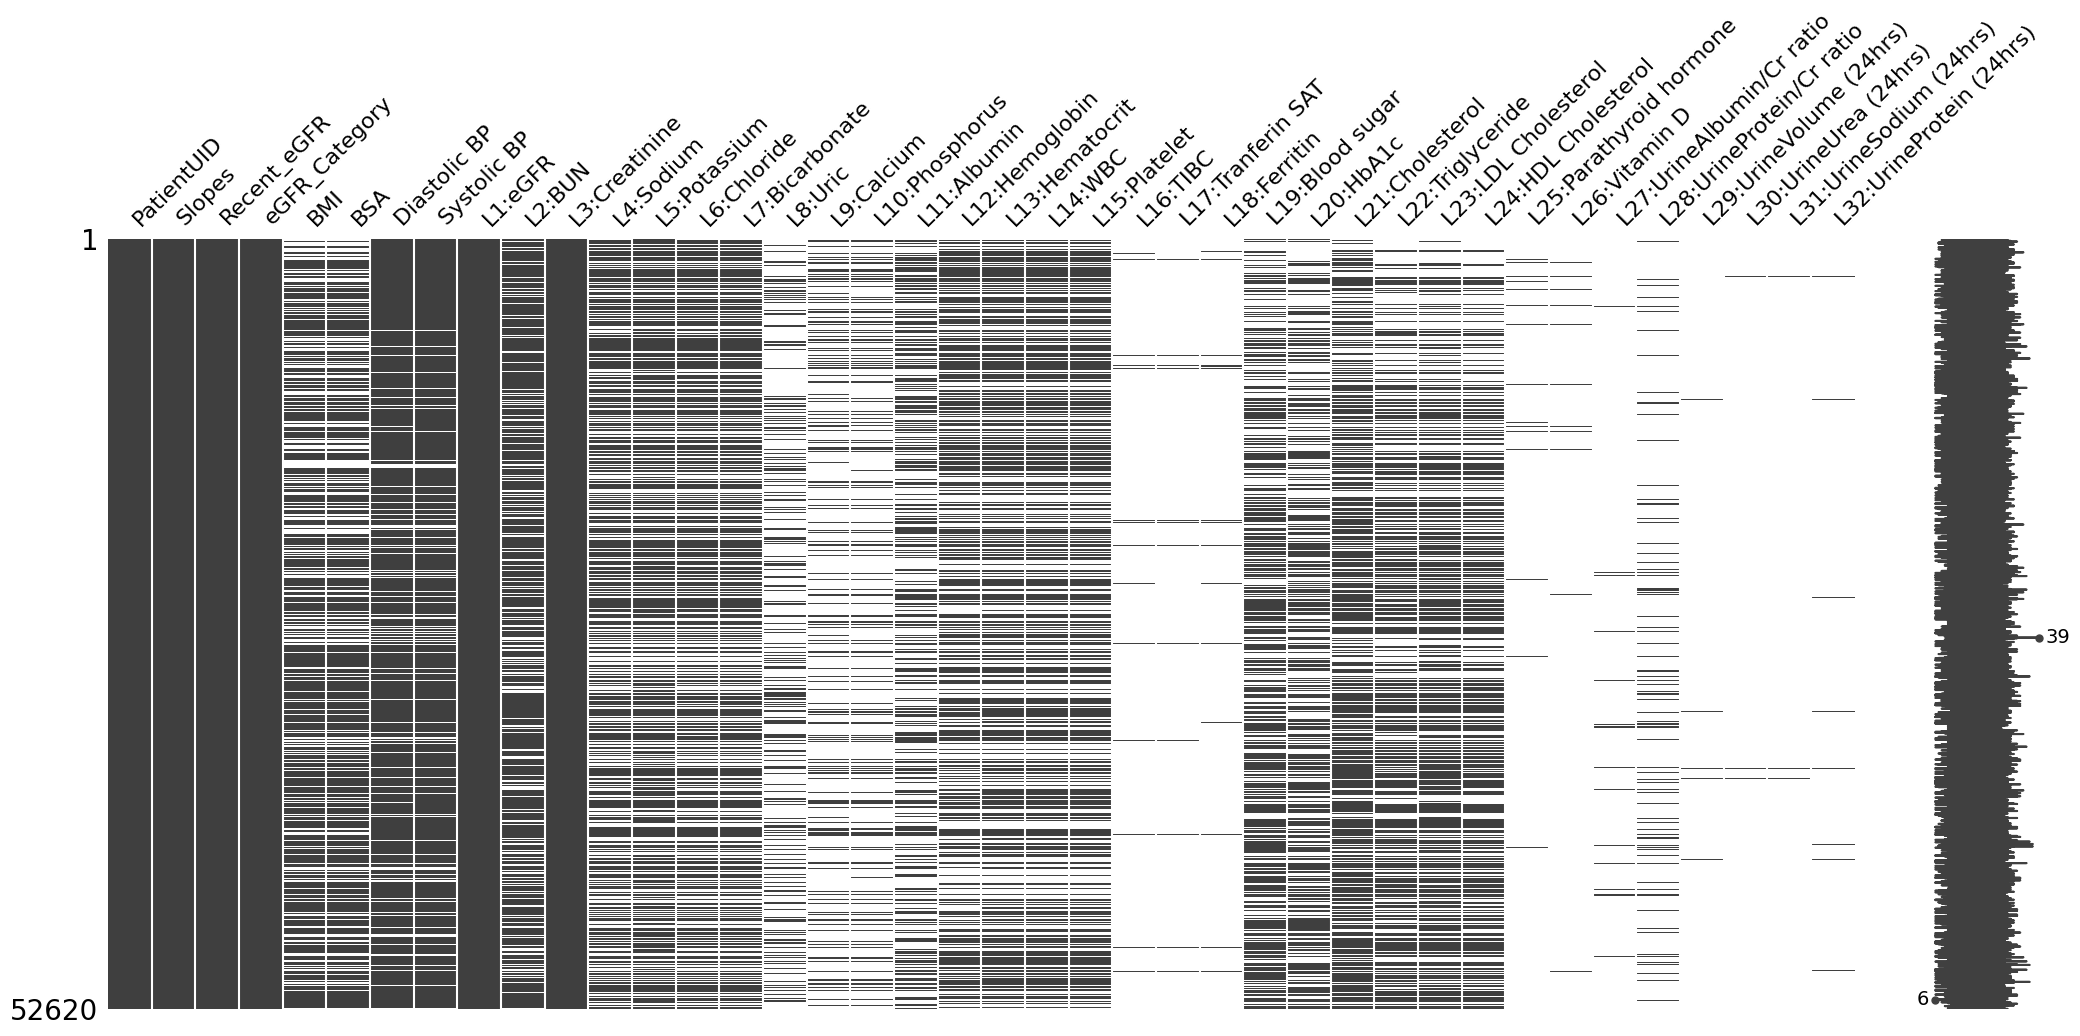

In [ ]:
import missingno as msno
msno.matrix(stage)
#ดูการเกิดขึ้นของค่าว่าง ซึ่งสีขาวคือค่าว่าง

## scatter plot

### eGFR

In [10]:
#ข้อมูลที่เรียงจากมากไปน้อยตาม Recent_eGFR
stage_sort.head()

PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI   BSA  \
51783      553538   0.058871       140.75       stage 1  18.88  1.20   
51784      553538 -51.636256       140.75       stage 1    NaN   NaN   
5319      2384626   0.795640       125.93       stage 1    NaN   NaN   
5318      2384626   7.984375       125.93       stage 1  23.31  1.54   
5317      2384626  79.441176       125.93       stage 1    NaN   NaN   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L23:LDL Cholesterol  \
51783          68.0        108.0   142.68     5.8  ...                  NaN   
51784          67.0        103.0   142.74     NaN  ...                  NaN   
5319           99.0        144.0   108.50    11.9  ...                  NaN   
5318           93.0        132.0   100.10     9.9  ...                  NaN   
5317           86.0        152.0    42.50    42.7  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
51783                  NaN                      NaN            NaN   
51784                  NaN                      NaN            NaN   
5319                   NaN                      NaN            NaN   
5318                   NaN                      NaN            NaN   
5317                   NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
51783                        NaN                        NaN   
51784                        NaN                        NaN   
5319                         NaN                        NaN   
5318                         NaN                        NaN   
5317                         NaN                       87.0   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
51783                      NaN                    NaN   
51784                      NaN                    NaN   
5319                       NaN                    NaN   
5318                       NaN                    NaN   
5317                       NaN                    NaN   

       L31:UrineSodium (24hrs)  L32:UrineProtein (24hrs)  
51783                      NaN                       NaN  
51784                      NaN                       NaN  
5319                       NaN                       NaN  
5318                       NaN                       NaN  
5317                       NaN                       NaN  

[5 rows x 40 columns]

In [13]:
stage_sort.columns

Index(['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category', 'BMI', 'BSA',
       'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
       'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
      dtype='object')

####plot แยกแต่ละระยะ

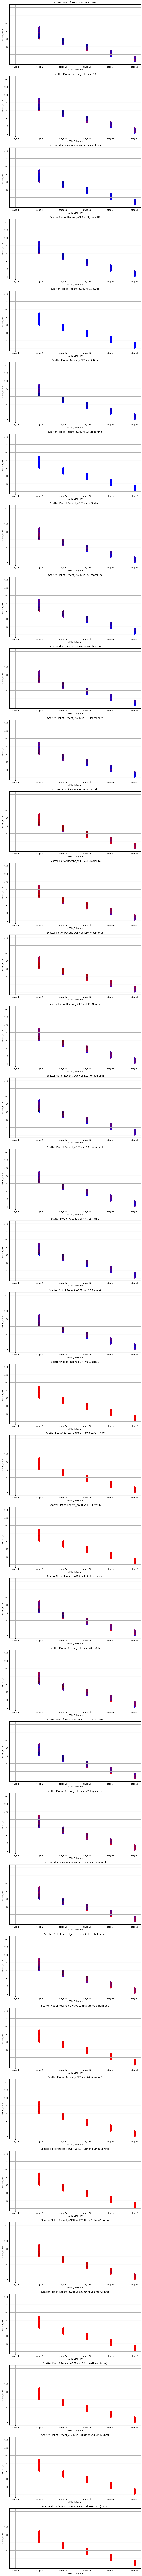

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# สร้าง scatter plot ทุกคอลัมน์
num_columns = len(stage_sort.columns) - 4  # ลบคอลัมน์ที่ไม่ต้องการพลอต (PatientUID, Slopes, Recent_eGFR, eGFR_Category)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

# ลูปเพื่อสร้าง scatter plot ในแต่ละคอลัมน์
for i, column in enumerate(stage_sort.columns[4:]):  # เริ่มต้นที่คอลัมน์ที่ 4 (BMI) เนื่องจาก 4 คือตำแหน่งที่คอลัมน์ที่เราต้องการเพิ่มพล็อต จะมีทั้งหมด 36 คอลัมน์
    # สร้าง scatter plot
    colors = ['red' if np.isnan(value) else 'blue' for value in stage_sort[column]]
    axes[i].scatter(stage_sort['eGFR_Category'], stage_sort['Recent_eGFR'], c=colors, alpha=0.5)

    # ปรับแต่งกราฟ
    axes[i].set_xlabel('eGFR_Category')
    axes[i].set_ylabel('Recent_eGFR')
    axes[i].set_title(f'Scatter Plot of Recent_eGFR vs {column}')
    axes[i].grid(True)

# ปรับแต่งกราฟทั้งหมด
plt.tight_layout()
plt.show()



####plot รวมทุกระยะ

In [46]:
# ใช้เมทอด melt เพื่อแปลงข้อมูล
result_stage = pd.melt(stage_sort, id_vars=['Recent_eGFR', 'eGFR_Category'],
                    value_vars=['BMI', 'BSA',
       'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
       'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
                    var_name='Each_lab',
                    value_name='Lab_Values')
result_stage



Recent_eGFR eGFR_Category                  Each_lab  Lab_Values
0             140.75       stage 1                       BMI       18.88
1             140.75       stage 1                       BMI         NaN
2             125.93       stage 1                       BMI         NaN
3             125.93       stage 1                       BMI       23.31
4             125.93       stage 1                       BMI         NaN
...              ...           ...                       ...         ...
1894315         1.05       stage 5  L32:UrineProtein (24hrs)         NaN
1894316         1.05       stage 5  L32:UrineProtein (24hrs)         NaN
1894317         1.05       stage 5  L32:UrineProtein (24hrs)         NaN
1894318         1.05       stage 5  L32:UrineProtein (24hrs)         NaN
1894319         1.05       stage 5  L32:UrineProtein (24hrs)         NaN

[1894320 rows x 4 columns]

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.DataFrame(result_stage)
# สร้าง scatter plot
plt.figure(figsize=(100, 100))

# แยกข้อมูลที่มีค่าว่างและไม่มีค่าว่าง
df_no_nan = result_stage.dropna(subset=['Lab_Values'])
df_nan = result_stage[result_stage['Lab_Values'].isna()]

# พล็อตจุดข้อมูลที่ไม่มีค่าว่าง
plt.scatter(df_no_nan['Each_lab'], df_no_nan[ 'Recent_eGFR'], label='NonMissing', color='blue', alpha = 0.5)

# พล็อตจุดข้อมูลที่มีค่าว่างและเปลี่ยนสีเป็นแดง
plt.scatter(df_nan['Each_lab'], df_nan[ 'Recent_eGFR'], label='Missing', color='red', alpha = 0.5)

# กำหนดลักษณะกราฟ
plt.title('Scatter Plot Data CKD')
plt.xlabel('Each_lab')
plt.ylabel('eGFR')
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()

### slope

โดยแบ่งออกเป็น better & worse
* better คือ >-0.5
* worse คือ <=-0.5



In [33]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
slope = df[missing_columns]
slope.head() #36 คอลัมน์ที่มีค่าว่าง

PatientUID  Recent_eGFR     Slopes    BMI   BSA  Diastolic BP  Systolic BP  \
0      924852         15.8   2.754717    NaN   NaN          53.0        131.0   
1      989278         32.3 -46.720000  18.71  1.70          71.0        121.0   
2     2103792         55.9  11.018868  23.56  1.47          93.0        143.0   
3      953611         51.1  17.222520  27.50  1.41          60.0        120.0   
4      488150         32.6 -79.002653    NaN   NaN           NaN          NaN   

   L1:eGFR  L2:BUN  L3:Creatinine  ...  L23:LDL Cholesterol  \
0     13.0     NaN            3.1  ...                  NaN   
1     80.3     5.2            1.0  ...                  NaN   
2     44.7    22.6            1.3  ...                  NaN   
3     33.5    28.9            1.5  ...                147.0   
4    114.2     NaN            0.7  ...                  NaN   

   L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                  NaN                      NaN            NaN   
1                  NaN                      NaN            NaN   
2                  NaN                      NaN            NaN   
3                 30.0                      NaN            NaN   
4                  NaN                      NaN            NaN   

   L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                       17.0   

   L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                      NaN                    NaN                      NaN   
1                      NaN                    NaN                      NaN   
2                      NaN                    NaN                      NaN   
3                      NaN                    NaN                      NaN   
4                      NaN                    NaN                      NaN   

   L32:UrineProtein (24hrs)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 39 columns]

In [34]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'better'
    else:
        return 'worse'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
slope['Slope_Category'] = slope['Slopes'].apply(categorize_slope)
slope.head()

<ipython-input-34-cf01b34a8ee3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope['Slope_Category'] = slope['Slopes'].apply(categorize_slope)


PatientUID  Recent_eGFR     Slopes    BMI   BSA  Diastolic BP  Systolic BP  \
0      924852         15.8   2.754717    NaN   NaN          53.0        131.0   
1      989278         32.3 -46.720000  18.71  1.70          71.0        121.0   
2     2103792         55.9  11.018868  23.56  1.47          93.0        143.0   
3      953611         51.1  17.222520  27.50  1.41          60.0        120.0   
4      488150         32.6 -79.002653    NaN   NaN           NaN          NaN   

   L1:eGFR  L2:BUN  L3:Creatinine  ...  L24:HDL Cholesterol  \
0     13.0     NaN            3.1  ...                  NaN   
1     80.3     5.2            1.0  ...                  NaN   
2     44.7    22.6            1.3  ...                  NaN   
3     33.5    28.9            1.5  ...                 30.0   
4    114.2     NaN            0.7  ...                  NaN   

   L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
0                      NaN            NaN                        NaN   
1                      NaN            NaN                        NaN   
2                      NaN            NaN                        NaN   
3                      NaN            NaN                        NaN   
4                      NaN            NaN                        NaN   

   L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
0                        NaN                      NaN                    NaN   
1                        NaN                      NaN                    NaN   
2                        NaN                      NaN                    NaN   
3                        NaN                      NaN                    NaN   
4                       17.0                      NaN                    NaN   

   L31:UrineSodium (24hrs)  L32:UrineProtein (24hrs)  Slope_Category  
0                      NaN                       NaN          better  
1                      NaN                       NaN           worse  
2                      NaN                       NaN          better  
3                      NaN                       NaN          better  
4                      NaN                       NaN           worse  

[5 rows x 40 columns]

In [35]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'Slope_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'Slope_Category','Recent_eGFR'] + [col for col in slope.columns if col not in ['PatientUID', 'Slopes', 'Slope_Category','Recent_eGFR']]
slope = slope[column_order]
slope.head()

PatientUID     Slopes Slope_Category  Recent_eGFR    BMI   BSA  \
0      924852   2.754717         better         15.8    NaN   NaN   
1      989278 -46.720000          worse         32.3  18.71  1.70   
2     2103792  11.018868         better         55.9  23.56  1.47   
3      953611  17.222520         better         51.1  27.50  1.41   
4      488150 -79.002653          worse         32.6    NaN   NaN   

   Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L23:LDL Cholesterol  \
0          53.0        131.0     13.0     NaN  ...                  NaN   
1          71.0        121.0     80.3     5.2  ...                  NaN   
2          93.0        143.0     44.7    22.6  ...                  NaN   
3          60.0        120.0     33.5    28.9  ...                147.0   
4           NaN          NaN    114.2     NaN  ...                  NaN   

   L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                  NaN                      NaN            NaN   
1                  NaN                      NaN            NaN   
2                  NaN                      NaN            NaN   
3                 30.0                      NaN            NaN   
4                  NaN                      NaN            NaN   

   L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                       17.0   

   L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                      NaN                    NaN                      NaN   
1                      NaN                    NaN                      NaN   
2                      NaN                    NaN                      NaN   
3                      NaN                    NaN                      NaN   
4                      NaN                    NaN                      NaN   

   L32:UrineProtein (24hrs)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 40 columns]

In [36]:
#จากน้อยไปมาก
slope_sort = slope.sort_values(by='Slopes', ascending=True)
slope_sort.head()

PatientUID     Slopes Slope_Category  Recent_eGFR    BMI   BSA  \
4          488150 -79.002653          worse        32.60    NaN   NaN   
51584     1139621 -74.927423          worse        25.44    NaN   NaN   
4671       515952 -68.120823          worse        75.50    NaN   NaN   
40820     2136999 -67.941878          worse        17.01  24.22  1.81   
48577     1582107 -67.405779          worse        24.08  20.80  1.70   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L23:LDL Cholesterol  \
4               NaN          NaN   114.20     NaN  ...                  NaN   
51584          77.0        185.0    95.40     9.6  ...                  NaN   
4671           60.0        113.0   125.20     8.0  ...                  NaN   
40820          76.0        150.0   101.98    12.0  ...                  NaN   
48577          86.0        141.0    77.80    12.4  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
4                      NaN                      NaN            NaN   
51584                  NaN                      NaN            NaN   
4671                   NaN                      NaN            NaN   
40820                  NaN                      NaN            NaN   
48577                  NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
4                            NaN                       17.0   
51584                        NaN                        NaN   
4671                         NaN                        NaN   
40820                        NaN                        NaN   
48577                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
4                          NaN                    NaN   
51584                      NaN                    NaN   
4671                       NaN                    NaN   
40820                      NaN                    NaN   
48577                      NaN                    NaN   

       L31:UrineSodium (24hrs)  L32:UrineProtein (24hrs)  
4                          NaN                       NaN  
51584                      NaN                       NaN  
4671                       NaN                       NaN  
40820                      NaN                       NaN  
48577                      NaN                       NaN  

[5 rows x 40 columns]

####plot แยกแต่ละตัวแปร

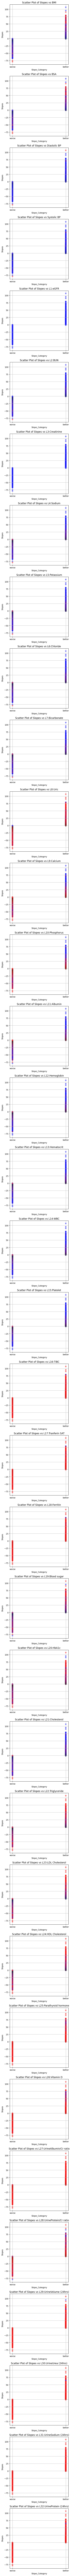

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# สร้าง scatter plot ทุกคอลัมน์
num_columns = len(slope_sort.columns) - 4  # ลบคอลัมน์ที่ไม่ต้องการพลอต (PatientUID, Slopes, Slope_Category, Recent_eGFR)
fig, axes = plt.subplots(num_columns, 1, figsize=(5, 5 * num_columns))

# ลูปเพื่อสร้าง scatter plot ในแต่ละคอลัมน์
for i, column in enumerate(slope_sort.columns[4:]):  # เริ่มต้นที่คอลัมน์ที่ 4 (BMI) เนื่องจาก 4 คือตำแหน่งที่คอลัมน์ที่เราต้องการเพิ่มพล็อต จะมีทั้งหมด 36 คอลัมน์
    # สร้าง scatter plot
    colors = ['red' if np.isnan(value) else 'blue' for value in slope_sort[column]]
    axes[i].scatter(slope_sort['Slope_Category'], slope_sort['Slopes'], c=colors, alpha=0.5)

    # ปรับแต่งกราฟ
    axes[i].set_xlabel('Slope_Category')
    axes[i].set_ylabel('Slopes')
    axes[i].set_title(f'Scatter Plot of Slopes vs {column}')
    axes[i].grid(True)

# ปรับแต่งกราฟทั้งหมด
plt.tight_layout()
plt.show()


#### รวมทุกตัวเเปร

In [49]:
# ใช้เมทอด melt เพื่อแปลงข้อมูล
result_slope = pd.melt(slope_sort, id_vars=['Slopes',	'Slope_Category'],
                    value_vars=['BMI', 'BSA',
       'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
       'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
                    var_name='Each_lab',
                    value_name='Lab_Values')
result_slope


Slopes Slope_Category                  Each_lab  Lab_Values
0        -79.002653          worse                       BMI         NaN
1        -74.927423          worse                       BMI         NaN
2        -68.120823          worse                       BMI         NaN
3        -67.941878          worse                       BMI       24.22
4        -67.405779          worse                       BMI       20.80
...             ...            ...                       ...         ...
1894315   79.001678         better  L32:UrineProtein (24hrs)         NaN
1894316   79.441176         better  L32:UrineProtein (24hrs)         NaN
1894317   90.231395         better  L32:UrineProtein (24hrs)         NaN
1894318   95.217391         better  L32:UrineProtein (24hrs)         NaN
1894319  106.892857         better  L32:UrineProtein (24hrs)         NaN

[1894320 rows x 4 columns]

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.DataFrame(result_slope)
# สร้าง scatter plot
plt.figure(figsize=(100, 100))

# แยกข้อมูลที่มีค่าว่างและไม่มีค่าว่าง
df_no_nan = result_slope.dropna(subset=['Lab_Values'])
df_nan = result_slope[result_slope['Lab_Values'].isna()]

# พล็อตจุดข้อมูลที่ไม่มีค่าว่าง
plt.scatter(df_no_nan['Each_lab'], df_no_nan[ 'Slopes'], label='NonMissing', color='blue', alpha = 0.5)

# พล็อตจุดข้อมูลที่มีค่าว่างและเปลี่ยนสีเป็นแดง
plt.scatter(df_nan['Each_lab'], df_nan[ 'Slopes'], label='Missing', color='red', alpha = 0.5)

# กำหนดลักษณะกราฟ
plt.title('Scatter Plot Data CKD')
plt.xlabel('Each_lab')
plt.ylabel('slope')
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()